<center> <h1> The Battle Of Neighborhoods </h1> </center> 

# Introduction


   <p>People often move from country to country or between cities for work meetings, where they dont know much about the neighborhoods of that particular city. So they may struggle to find the perfect hotel near thier work place. Hence this problem is solved by gathering the data of city and make the clusters of all the hotels. So that when user will put the location of his work place he will get recommendation of all the hotels near that location which are present in the same cluster. </p>

# Data Section

<p>We will use Geopy to get the Latitude and Longitude values of the cities and user workplace. Then to get the data about hotels and its name and distance all the opther things we will be using Foursquare. We will request foursquare for hotel data which will be returned in Json file. Then information will be extracted from that json file to DataFrame which will be further be used in clustering process. </p>

# Importing Libraries

In [7]:
from geopy.geocoders import Nominatim  #Obtain the latitude and longitude
import folium #USed to create map

In [8]:
import json, requests
import pandas as pd
import matplotlib.pyplot as plt

# Getting latitude and longitude of New York City

In [98]:
address = 'new york'
geolocator = Nominatim(user_agent='tor_exp')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


# Showing on map

In [110]:
mb_map = folium.Map(location=[latitude, longitude], zoom_start=10)

In [115]:
mb_map

# Connecting to Foursquare

In [86]:
url = 'https://api.foursquare.com/v2/venues/search'

params = dict(
  client_id='YHGYTIK2N2PBCCPQG1R3NH3FZGUJVKU0UAI4MZETKSYCY35H',
  client_secret='CFWYEGLWXPSMKIMNA3GABPS25FOAM5W2KQYQ0M4CRFF4LHHA',
  v='20180323',
  ll='40.7127281,-74.0060152',
  query='Hotel',                             #tell them what you want
  limit=40
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text) 

# Creating Dataframe from Json file

In [87]:
name = []
address = []
lat = []
lng = []
distance=[]
city = []

In [88]:
for g in data['response']['venues']:
    name.append(g['name'])
    address.append(g['location']['address'])
    lat.append(g['location']['lat'])
    lng.append(g['location']['lng'])
    distance.append(g['location']['distance'])
    city.append(g['location']['city'])


In [89]:
zippedList =  list(zip(name,distance,lat,lng))

In [90]:
df_hotel= pd.DataFrame(zippedList,columns=['Name','Distance','Lat','Lng','City','Address'])

In [ ]:
df_hotel.to_csv('hotel.csv')

In [96]:
df=pd.read_csv('hotel.csv')

In [97]:
df.head()

,Name,Distance,Lat,Lng,City,Address
0,Smyth Hotel,379,40.715144,-74.009183,New York,85 W Broadway
1,The Roxy Hotel,740,40.719341,-74.005044,New York,2 Avenue of the Americas
2,Four Seasons Hotel New York Downtown,284,40.712612,-74.009380,New York,27 Barclay St
3,Soho Grand Hotel,1036,40.721942,-74.004217,New York,310 W Broadway
4,Hotel 50 Bowery NYC,856,40.715936,-73.996789,New York,50 Bowery


# Performing Clustering

In [99]:
from sklearn.cluster import KMeans

In [102]:
X=df.iloc[:,[2,3]].values

# Using Elbow Method To Find The Value of Cluster

In [103]:
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(X)
    wcss.append(km.inertia_)

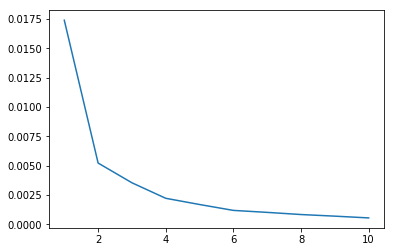

In [104]:
plt.plot(range(1,11),wcss)
plt.show()

# K-means

In [105]:
km = KMeans(n_clusters=4,init='k-means++')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [106]:
y_pred = km.predict(X)

In [107]:
y_pred

array([0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0,
       1, 0, 0, 2, 3, 3, 3, 3, 2, 0, 1, 0, 0, 2, 3, 1, 1, 1])

# Including Cluster Numbers To Dataframe

In [108]:
df['Cluster']=y_pred

In [109]:
df.head()

,Name,Distance,Lat,Lng,City,Address,Cluster
0,Smyth Hotel,379,40.715144,-74.009183,New York,85 W Broadway,0
1,The Roxy Hotel,740,40.719341,-74.005044,New York,2 Avenue of the Americas,0
2,Four Seasons Hotel New York Downtown,284,40.712612,-74.009380,New York,27 Barclay St,0
3,Soho Grand Hotel,1036,40.721942,-74.004217,New York,310 W Broadway,0
4,Hotel 50 Bowery NYC,856,40.715936,-73.996789,New York,50 Bowery,2


# Asking User To Enter The Name Of Neighbourhood 

In [113]:
add = input('Enter the neighbourhood name where you want to stay = ')

Enter the neighbourhood name where you want to stay = Chinatown,New York


In [83]:
address = add
geolocator = Nominatim(user_agent='tor_exp')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates are {}, {}.'.format(latitude, longitude))

The geograpical coordinates are 40.7164913, -73.9962504.


In [84]:
ans = km.predict([[latitude,longitude]])

# Recommended Hotels Name

In [114]:
df.loc[df['Cluster'] == ans[0]]

,Name,Distance,Lat,Lng,City,Address,Cluster
4,Hotel 50 Bowery NYC,856,40.715936,-73.996789,New York,50 Bowery,2
5,Hotel Indigo,1816,40.721762,-73.988092,New York,171 Ludlow St,2
8,The Leon Hotel,984,40.715994,-73.995171,New York,125 Canal St,2
10,Mercer Hotel,1486,40.724828,-73.998553,New York,147 Mercer St,2
14,SIXTY SoHo Hotel,1276,40.723990,-74.003160,New York,60 Thompson St,2
15,Hotel Chantelle,1567,40.718483,-73.989056,New York,92 Ludlow St,2
17,The Bowery Hotel,1924,40.726145,-73.991627,New York,335 Bowery,2
19,SIXTY LES Hotel,1807,40.722090,-73.988510,New York,190 Allen St,2
20,The Ludlow Hotel,1884,40.721857,-73.987204,New York,188 Ludlow St,2
25,Best Western Bowery Hanbee Hotel,1112,40.718446,-73.995198,New York,231 Grand St,2
